In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# making a dataframe
df = pd.read_csv('exams(1).csv')
df.head()

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.info

<bound method DataFrame.info of        exam_1     exam_2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]>

In [4]:
df.dtypes

exam_1      float64
exam_2      float64
admitted      int64
dtype: object

In [5]:
df1, df2 = df.loc[df['admitted'] == 1 ] ,df.loc[df['admitted'] == 0 ]

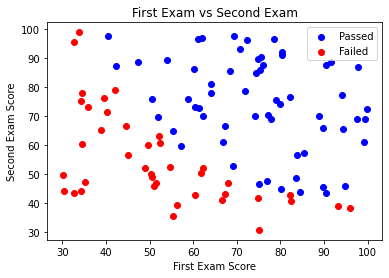

In [6]:
X = df1['exam_1']
Y = df1['exam_2']
X1 = df2['exam_1']
Y1 = df2['exam_2']
plt.scatter(X,Y, c = "b", label = 'Passed')
plt.scatter(X1,Y1, c = "r", label = 'Failed')
plt.title('First Exam vs Second Exam')
plt.xlabel('First Exam Score')
plt.ylabel('Second Exam Score')
plt.legend()
plt.show()

# Logistic regression from scratch

The following scrip is the Logistic regression from scratch

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )

# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit( self, X, Y ) :		
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape		
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :		
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		# calculate gradients		
		tmp = ( A - self.Y.T )		
		tmp = np.reshape( tmp, self.m )		
		dW = np.dot( self.X.T, tmp ) / self.m		
		db = np.sum( tmp ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y


# Driver code

def main() :
	
	# Importing dataset	
	df = pd.read_csv( "exams(1).csv" )
	X = df.iloc[:,:-1].values
	Y = df.iloc[:,-1:].values
	
	# Splitting dataset into train and test set
	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )
	
	# Model training	
	model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
	
	model.fit( X_train, Y_train )	
	model1 = LogisticRegression()	
	model1.fit( X_train, Y_train)
	
	# Prediction on test set
	Y_pred = model.predict( X_test )	
	Y_pred1 = model1.predict( X_test )
	
	# measure performance	
	correctly_classified = 0	
	correctly_classified1 = 0
	
	# counter	
	count = 0	
	for count in range( np.size( Y_pred ) ) :
		
		if Y_test[count] == Y_pred[count] :			
			correctly_classified = correctly_classified + 1
		
		if Y_test[count] == Y_pred1[count] :			
			correctly_classified1 = correctly_classified1 + 1
			
		count = count + 1
		
	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )


if __name__ == "__main__" :	
	main()


Accuracy on test set by our model	 :  67.64705882352942
Accuracy on test set by sklearn model :  88.23529411764706


# Logistic regression using Library (sklearn)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [17]:
X = df.drop(labels='admitted', axis=1)
Y = df['admitted']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11  0]
 [ 4 15]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.79      0.88        19

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30

